# Least Squares Fitting
This example describes a linear least-squares analysis.
  * The code is loosely based on the example: https://root.cern/doc/master/solveLinear_8C.html
  * Many detailed references are avilaible for the least squares technique, for example see: http://vmls-book.stanford.edu/vmls.pdf

Linear regression can be used to solve for ($k$) unknown parameters ($\theta$) in a model of the form:

$\hat f(x; \vec\theta) = \theta_1*f_1(x) + \theta_2*f_2(x) + \theta_3*f_3(x) + ... + \theta_k*f_k(x)$,<br>
where the $f_i(x)$ can be arbitrary functions of $x$, but each term $\theta_i*f_i(x)$ can only depend linearly on the parameters, $\frac{\partial^2 f(x)}{\partial \theta_{i}^2} = 0$.<br>
For a given $x$, our predicted outcome is $\hat y = \hat f(x)$.

Let's assume we have vectors of $n$ measurements $x_i$, then $y_i \equiv \hat f(x_i) = \hat y_i$, where the equivalence is true to a good approximatation if the model is a good representation of our data.  To find the model $\hat f$ that it is most consistent with our data, we will minimze (a function of) the residuals for each data point $r_i=y_i−\hat y_i$.

Define the vectors: 
  * $y^d= (y_1,...,y_n)$ : values of dependent variables measured in data, our observations
  * $\hat y^d= (\hat y_1,...,\hat y_n)$ : expected values of the observations, given our model
  * $r^d= (r_1,...,r_n)$ : residuals between the data and model
  
For a least squares fitting model, we want to find the parameters $\vec\theta$ that minimize the sum of squares of the prediction error.  In performing this calculation we will weight the residuals by the inverse of the uncertainy in each measurement.  As discussed in class, the uncertainties follow a normal distribution and this is equivalent to minimizing the $\chi^2$ value.

Each measurement gives us information about the unknown parameters $\vec \theta$.  We can write the expectation for our model for each $x_i$ as:<br>
$\hat f(x_i; \vec \theta) = \hat y(x_i)= A_{i1}\theta_1 + A_{i2}\theta_2 + ... + A_{ik}\theta_k,~ i=1,...,n$,<br>
where we define the $n×k$ matrix $A$ as $A_{ij}=f_j(x_i),  i= 1,...,n, ~ j= 1,...,k$.

Writing this in matrix notation gives :<br>
$\hat y^d = {\bf A}\,\vec θ$

The sum of squares of the residuals is then 
$|r^d|^2 = |y^d−\hat y^d|^2 = |y^d−{\bf A}\,\vec θ|^2$, which is the quantity we want to minimze by requiring:
$\frac{\partial |r^d|^2} {\partial \theta_i} = \frac{\partial  |y^d−{\bf A}\,\vec θ|^2 } {\partial \theta_i} = 0 $.

# Example: solution to linear fit for 1st order polynomial: y = a + bx

Where we include the following four data points in the fit:<br>
$x$ = {0.0,1.0,2.0,3.0}<br>
$y^d$ = {1.4,1.5,3.7,4.1}<br>
$\sigma^d$ = {0.5,0.2,1.0,0.5}

Using the notation above, we have 
$\hat y^d = {\bf A}\,\vec θ$, and writing out the terms explicitly gives:

$\vec θ = \begin{pmatrix} a \\ b \end{pmatrix}$, $f_1(x_i) = 1, f_2(x_i)=x_i$, eg. $y = a + bx$<br>
$y^d = \begin{pmatrix} y_1 \\ y_2 \\ y_3 \\ y_4 \end{pmatrix}$, 
${\bf A} =
\begin{pmatrix} 
A_{11} & A_{12} \\
A_{21} & A_{22} \\ 
A_{31} & A_{32} \\
A_{41} & A_{42}
\end{pmatrix} =
\begin{pmatrix} 
f_1(x_1) & f_2(x_1) \\ 
f_1(x_2) & f_2(x_2) \\ 
f_1(x_3) & f_2(x_3) \\ 
f_1(x_4) & f_2(x_4) 
\end{pmatrix}$
"N_parameters" wide, "N_data_points" deep.

To be explicit, $\hat y^d = {\bf A}\,\vec θ$, so:

$ \begin{pmatrix} 
f_1(x_1) & f_2(x_1) \\ 
f_1(x_2) & f_2(x_2) \\ 
f_1(x_3) & f_2(x_3) \\ 
f_1(x_4) & f_2(x_4) 
\end{pmatrix}$
$\begin{pmatrix} a \\ b \end{pmatrix} = $
$\begin{pmatrix} 
a + bx_1 \\ 
a + bx_2 \\ 
a + bx_3 \\ 
a + bx_4 \\ 
\end{pmatrix}=
\begin{pmatrix} 
\hat y_1 \\ 
\hat y_2 \\ 
\hat y_3 \\ 
\hat y_4 \\ 
\end{pmatrix}
=\hat y^d $

and using:

$|r^d|^2 = |y^d - \hat y^d|^2 = |y^d−{\bf A}\,\vec θ|^2$, where we require: $\frac{\partial |r^d|^2} {\partial \theta_i} =0 $

we have the following system of equations to solve:

$ 0 = -2 \sum_i [ y^d_i - f_1(x_i)\theta_1 - f_2(x_i)\theta_2 ] f_1(x_i) $ <br>
$ 0 = -2 \sum_i [ y^d_i - f_1(x_i)\theta_1 - f_2(x_i)\theta_2 ] f_2(x_i) $ <br>
or $ 0 = (y^d - {\bf A}\vec\theta){\bf A}^T$ <br>
For $\chi^2$ minimization, we just multiply ${\bf A}$ and $y^d$ by $\frac{1}{\sigma^d}$.  In other words $|r^d|^2=\chi^2$.

Provided the columns of ${\bf A}$ are linearly independent, we can solve this least squares problem to find $\vec\theta$, the model parameter values that minimize above prediction error for our data set, using:<br>
$\vec\theta = ({\bf A}^T{\bf A})^{-1} {\bf A}^T y^d={\bf A}^\dagger y^d$

This example uses the following ROOT classes that may be new to you:
  * TMatrixD: a matrix of doubles.  Its methods are documented in the base class [TMatrixT](https://root.cern.ch/doc/master/TMatrixT_8h.html)
  * TVectorD: a vector of doubles.  Its methods are documented in the base class [TVectorT](https://root.cern.ch/doc/master/classTVectorT.html)
  * [TGraphErrors](https://root.cern.ch/doc/master/classTGraphErrors.html): A version of TGraph that supports the drawing of errorbars

**This notebook is written in C++ using the "%%cpp magick" to convert cells from interpreting python to interpreting C++.  You can always access variables from the C++ side in python using the form R.var.  See the example at the bottom of this notebook.  You will probably find working on the notebook with C++ to be awkward, see the description of the exercice below for starter code that you can run outside the notebook.**  

In [3]:
import ROOT as R

C system headers (glibc/Xcode/Windows SDK) must be installed.
In file included from input_line_4:36:
/home/mohha/miniconda3/envs/openmc-env/bin/../lib/gcc/x86_64-conda-linux-gnu/13.4.0/include/c++/cassert:44:10: fatal error: 'assert.h' file not found
#include <assert.h>
         ^~~~~~~~~~
input_line_37:1:10: fatal error: 'dlfcn.h' file not found
#include "dlfcn.h"
         ^~~~~~~~~


In [4]:
%%cpp -d
#include "Riostream.h"
#include "TMatrixD.h"
#include "TVectorD.h"
#include "TGraphErrors.h"
#include "TF1.h"
#include "TH1F.h"
#include "TH2F.h"

SolveLSQ returns:
$\vec\theta = ({\bf A}^T{\bf A})^{-1} {\bf A}^T y^d={\bf A}^\dagger y^d$<br>
For the $\chi^2$ minimization, ${\bf A}$ and $y^d$ are assumed to be weighted by the measurement uncertinties.

In [5]:
%%cpp -d
TMatrixD SolveLSQ(const TMatrixD &A, const TMatrixD &y){
  TMatrixD AT=(A);  
  AT.T();            // A transpose
  TMatrixD ATAi(AT,TMatrixD::kMult,A);
  ATAi.Invert();
  TMatrixD Adag(ATAi,TMatrixD::kMult,AT);  // (A^T A)^(-1) A^T
  TMatrixD theta(Adag,TMatrixD::kMult,y);  // (A^T A)^(-1) A^T * y
  return theta;
}

In [6]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt 

Define the input data

Perform the fit  y = a + b * x 


<ErrorbarContainer object of 3 artists>

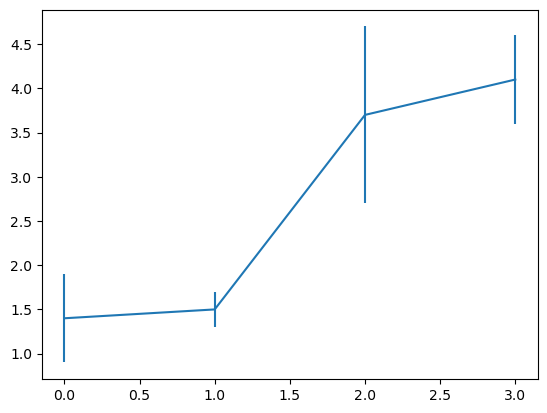

In [7]:
print("Perform the fit  y = a + b * x ")
nPar  = 2;

ax = np.array([0.0,1.0,2.0,3.0], dtype='d')  # x_1
ay = np.array([1.4,1.5,3.7,4.1], dtype='d')  # y_i
ae = np.array([0.5,0.2,1.0,0.5], dtype='d')  # sigma_i
nPnts = len(ax)

plt.errorbar(ax, ay, yerr=ae)

In [8]:
A=np.matrix(np.zeros((nPnts, nPar)))
#Fill the A matrix
for nr in range(nPnts):
    for nc in range(nPar):
        if nc==0: A[nr,nc] = 1
        else: A[nr,nc] = ax[nr]
A

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.]])

Apply the weights to A and y:

In [9]:
for i in range(nPnts):
    A[i] = A[i] / ae[i]
yw = (ay/ae).reshape(nPnts,1)
A,yw

(matrix([[2., 0.],
         [5., 5.],
         [1., 2.],
         [2., 6.]]),
 array([[2.8],
        [7.5],
        [3.7],
        [8.2]]))

In [10]:
# Solve for the parameters

theta =  inv(np.transpose(A).dot(A)).dot(np.transpose(A)).dot(yw)

theta

matrix([[0.63584906],
        [1.06618287]])

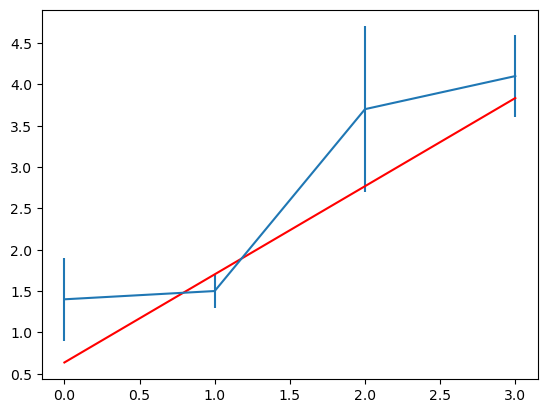

In [11]:
xi = np.linspace(ax.min(),ax.max())
yi = theta[0,0] + theta[1,0]*xi
plt.errorbar(ax, ay, yerr=ae)
plt.plot(xi,yi,color="r")

Go back and add more data points to the data and see how the code adapts to perform your fit.

# Exercise


The functions `getX` and `getY` below are used to generate a random data distribution following a function of logarithmic values.

$f(x) = a + b*log(x) + c*log(x)*log(x)$

The y-values are randomly generated.  You can run execute the code multiple times to see the distribution changing.

Your task is to use the least squares fittng technique using the function above to extract the parameters a, b, c from the fit, based on the generated x, y, ey values.

Once you have the fit working, perform the following studies:

 * Repeat the fit a large number of times on different data sets
 * Create a 2x2 panel canvas and plot
   * (1--3) the distribution of values of a, b, c in three histograms
   * (4) calculate the chi^2 for each fit and plot the distribution of the $\chi^2$ over the experiments
 * Observe how the extracted parameters fluctuate.  How is this result affected if you increase/decrease the number of points in your experiment or increase/decrease the size of the uncertainties?
 * Compare the mean and standard deviation of the chi2 distribution to expectations
 * In a second 2x2 canvas plot
   * (1) The values of parameter $b$ vs $a$ over the experiments (2D histogram, use the 'colz' plotting option)
   * (2) The values of parameter $c$ vs $a$ over the experiments 
   * (3) The values of parameter $c$ vs $b$ over the experiments 
   * (4) The distribution of the *reduced* $\chi^2$ over the experiments 

Place your plots and comments into a single PDF file called `LSQFit.pdf` and upload this along with your work to GitHub.

Below is an illustration of the pseudoexperiments that are generated in the `LSQFit` program that you will modify.

In [12]:
xmin=1.0
xmax=20.0
npoints=12
sigma=0.2
lx=np.zeros(npoints)
ly=np.zeros(npoints)
ley=np.zeros(npoints)
pars=[0.5,1.3,0.5]

from math import log
def f(x,par):
    return par[0]+par[1]*log(x)+par[2]*log(x)*log(x)

from random import gauss
def getX(x):  # x = array-like
    step=(xmax-xmin)/npoints
    for i in range(npoints):
        x[i]=xmin+i*step
        
def getY(x,y,ey):  # x,y,ey = array-like
    for i in range(npoints):
        y[i]=f(x[i],pars)+gauss(0,sigma)
        ey[i]=sigma

<ErrorbarContainer object of 3 artists>

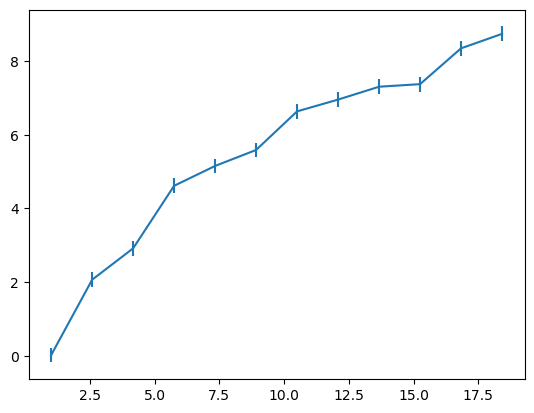

In [13]:
# get a random sampling of the (x,y) data points, rerun to generate different data sets for the plot below
getX(lx)
getY(lx,ly,ley)
plt.errorbar(lx, ly, yerr=ley)